In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
import neo
import elephant 
import viziphant

## Generate a gamma process

In [2]:
# Regularity defined by `shape_factor`: higher values -> more clock-like
gamma_process = elephant.spike_train_generation.StationaryGammaProcess(
    rate=10*pq.Hz, 
    shape_factor=20, 
    t_start=0*pq.ms,
    t_stop=50*pq.s)

st = gamma_process.generate_spiketrain()

In [3]:
# Show resulting SpikeTrain
st

SpikeTrain containing 499 spikes; units s; datatype float64 
time: 0.0 s to 50.0 s

## Plot the first seconds of the spike train

<Axes: xlabel='Time (s)'>

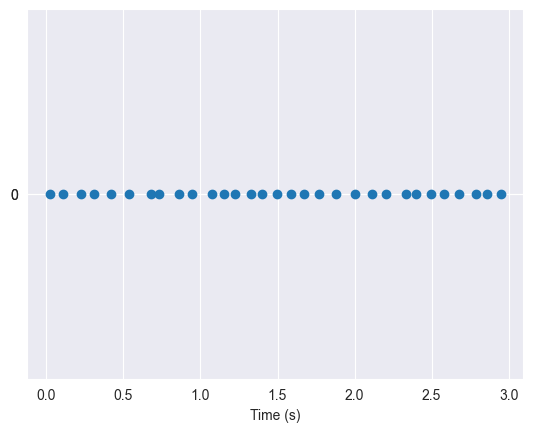

In [4]:
# Slice spike train to first few seconds before plotting
viziphant.rasterplot.rasterplot(
    [st.time_slice(t_start=0*pq.ms, t_stop=3000*pq.ms)])

## Create a binned representation of the spike train

In [5]:
bst = elephant.conversion.BinnedSpikeTrain(
    st, bin_size=1*pq.ms)

In [6]:
# Show dimensions of the spike train
bst.to_array().shape

(1, 50000)

## Convert binned spike train object to a time series object

In [7]:
binned_spikes_timeseries = neo.AnalogSignal(
    bst.to_array().transpose()/bst.bin_size*pq.dimensionless, 
    t_start=bst.t_start, 
    sampling_period=bst.bin_size)

## Create a Welch PSD estimate

In [8]:
# Convert binned spike train to an Analog Signal in order to retain the units
f_w,psd_w = elephant.spectral.welch_psd(
    binned_spikes_timeseries)

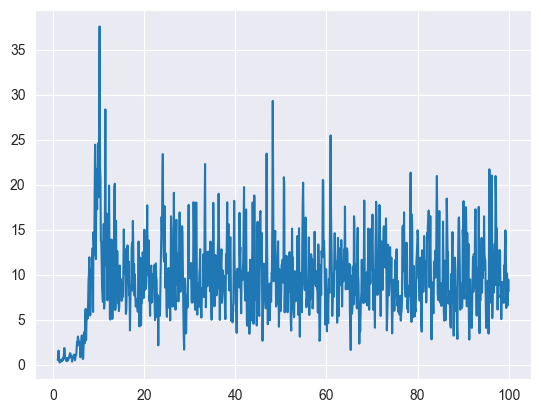

In [9]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_w.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_w.rescale(pq.Hz).magnitude, 100)
plt.plot(f_w[lower_f_index:upper_f_index], np.transpose(psd_w[0, lower_f_index:upper_f_index]/2))

## Create a multitaper PSD estimate

In [10]:
# Convert binned spike train to an Analog Signal in order to retain the units
f_mt, psd_mt = elephant.spectral.multitaper_psd(
    binned_spikes_timeseries)

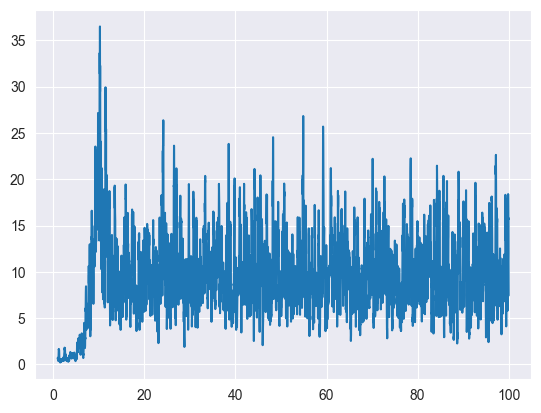

In [11]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_mt.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_mt.rescale(pq.Hz).magnitude, 100)
plt.plot(f_mt[lower_f_index:upper_f_index], np.transpose(psd_mt[0, lower_f_index:upper_f_index]/2))

## Create a multi-segment averaged multitaper PSD estimate

In [12]:
# Convert binned spike train to an Analog Signal in order to retain the units
f_mtn, psd_mtn = elephant.spectral.segmented_multitaper_psd(
    binned_spikes_timeseries, n_segments=10)

/home/denker/miniconda3/envs/elephant_0.14.0/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


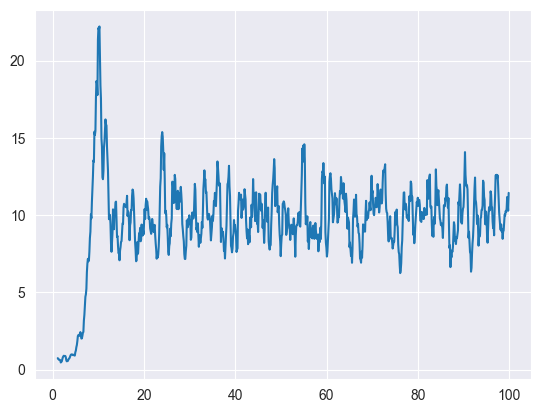

In [13]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_mtn.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_mtn.rescale(pq.Hz).magnitude, 100)
plt.plot(f_mtn[lower_f_index:upper_f_index], np.transpose(psd_mtn[0, 0, lower_f_index:upper_f_index]/2))